<a href="https://colab.research.google.com/github/yja01270/abcd/blob/master/%EC%84%9C%EC%9A%B8%EC%8B%9C_%EB%A7%88%ED%8F%AC%EA%B5%AC_%EB%94%B0%EB%A6%89%EC%9D%B4_%EB%AA%A8%EB%8D%B8_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [48]:
# 데이터 불러오기
data = pd.read_csv('/따릉이/train.csv')

In [49]:
# column 정보

# id : id
# hour : 시간
# hour_bef_temperature : 1시간 전 기온
# hour_bef_precipitation : 1시간 전 비 정보(비가 오지 않았으면 0, 비가 오면 1)
# hour_bef_windspeed : 1시간 전 풍속(평균)
# hour_bef_humidity : 1시간 전 습도
# hour_bef_visibility : 1시간 전 가시거리
# hour_bef_ozone : 1시간 전 오존 농도
# hour_bef_pm10 : 1시간 전 미세먼지 농도
# hour_bef_pm2.5 : 1시간 전 초미세먼지 농도
# count : 시간에 따른 따릉이 대여 수 

In [50]:
# 데이터 구조 살펴보기

In [51]:
# 1459개의 행과 11개의 열로 이루어져있다.
data.shape

(1459, 11)

In [52]:
# 데이터에는 ID, hour, 1시간전 (기온, 우천 정보, 풍속, 습도, 시계, 오존농도, 미세먼지, 초미세먼지) 정보, 따릉이 대여 수가 있다.
data.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [53]:
# 데이터 정보 확인
# id와 hour는 int형, 나머지 변수들은 float형으로 이루어져있다.
# Non-Null을 보면 id, hour, count는 Null값이 없고 나머지 열에는 Null값이 존재한다.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [54]:
# 데이터의 기본 통계 정보를 요약하여 확인한다.
data.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


In [55]:
# column별 결측치 개수 확인
data.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [56]:
# 결측치 채워넣기
# 데이터의 양이 많지 않아 결측치를 제거하는 대신 채워 넣는 방법을 선택했다.
# 결측치는 각 열의 평균값으로 대체하였다.
data = data.fillna(data.mean())

In [57]:
# 결측치 수정 후 columns별 결측치 갯수 확인
data.isnull().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64

In [58]:
# 데이터 정보를 다시 확인했을 때 결측치가 다시 채워진 것을 확인할 수 있다.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1459 non-null   float64
 3   hour_bef_precipitation  1459 non-null   float64
 4   hour_bef_windspeed      1459 non-null   float64
 5   hour_bef_humidity       1459 non-null   float64
 6   hour_bef_visibility     1459 non-null   float64
 7   hour_bef_ozone          1459 non-null   float64
 8   hour_bef_pm10           1459 non-null   float64
 9   hour_bef_pm2.5          1459 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [59]:
boxplot_columns = ['hour', 'hour_bef_temperature', 'hour_bef_windspeed', 'hour_bef_humidity', 
                   'hour_bef_visibility', 'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5', 'count']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

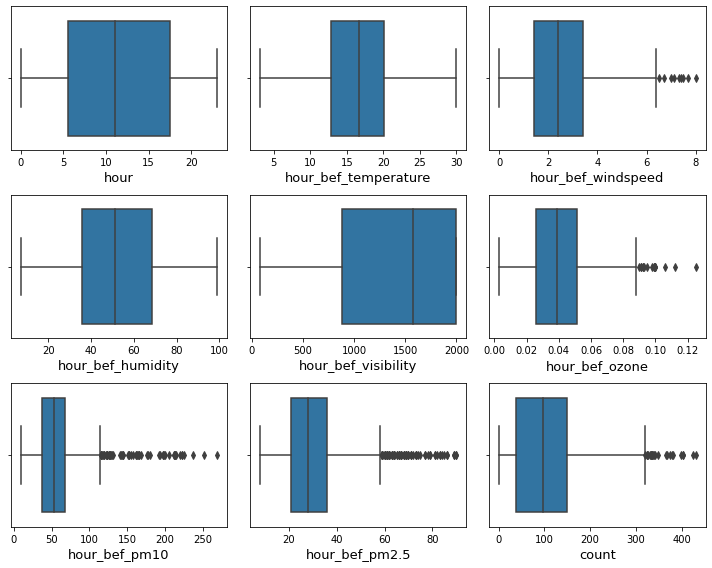

In [60]:
# column별 boxplot 그래프로 데이터 분포 및 이상치를 확인한다.
plt.figure(figsize=(10, 8))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data[boxplot_columns[i]])
    plt.xlabel(boxplot_columns[i], fontsize=13)
plt.tight_layout()
plt.show()

In [61]:
# 이상치 제거 함수
def outlier_remove(df, column):
    Q1, Q3 = np.percentile(df, [25, 75])
    IQR = Q3 - Q1
    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)
    
    return df[(lower_bound < df[column]) & (df[column] < upper_bound)]

In [62]:
# hour_bef_windspeed, hour_bef_ozone, hour_bef_pm10, hour_bef_pm2.5 4개의 column에 대해서만 이상치를 제거한다.
data = outlier_remove(data, 'hour_bef_windspeed')
data = outlier_remove(data, 'hour_bef_ozone')
data = outlier_remove(data, 'hour_bef_pm10')
data = outlier_remove(data, 'hour_bef_pm2.5')

In [63]:
# 이상치 처리후 1446개의 행이 남은 것을 볼 수 있다.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1446 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1446 non-null   int64  
 1   hour                    1446 non-null   int64  
 2   hour_bef_temperature    1446 non-null   float64
 3   hour_bef_precipitation  1446 non-null   float64
 4   hour_bef_windspeed      1446 non-null   float64
 5   hour_bef_humidity       1446 non-null   float64
 6   hour_bef_visibility     1446 non-null   float64
 7   hour_bef_ozone          1446 non-null   float64
 8   hour_bef_pm10           1446 non-null   float64
 9   hour_bef_pm2.5          1446 non-null   float64
 10  count                   1446 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 135.6 KB


In [64]:
# 탐색적 분석 과정

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


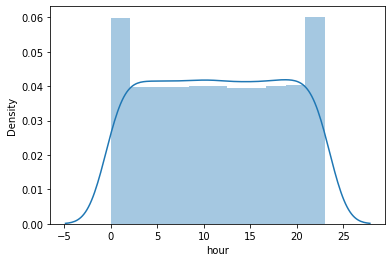

In [65]:
# 시간 데이터는 균등분포를 나타내는 것을 볼 수 있다.
sns.distplot(data['hour'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


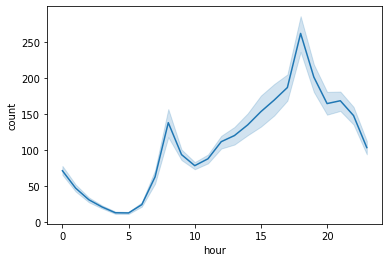

In [66]:
# 시간대별 대여 대수 라인 그래프
# 7~8시, 17~18시 출퇴근 시간대에 가장 대여 대수가 많은 것을 볼 수 있다.
sns.lineplot(data['hour'], data['count'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


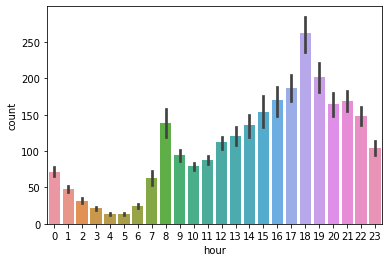

In [67]:
# 시간대별 대여 대수 바 그래프
# 7~8시, 17~18시 출퇴근 시간대에 가장 대여 대수가 많은 것을 볼 수 있다.
sns.barplot(data['hour'], data['count'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


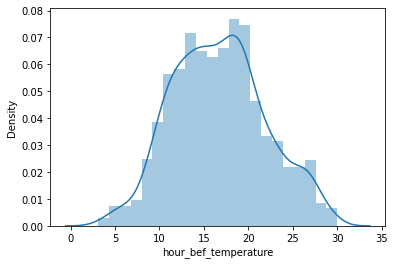

In [68]:
# 온도 데이터는 정규분포를 따르는 것을 볼 수 있다.
sns.distplot(data['hour_bef_temperature'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


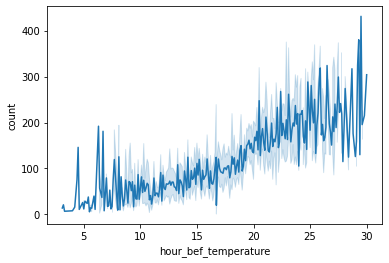

In [69]:
# 온도에 따른 대여 대수 그래프
# 온도가 높을수록 따릉이 대여 대수가 많은 것을 알 수 있다.
sns.lineplot(data['hour_bef_temperature'], data['count'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


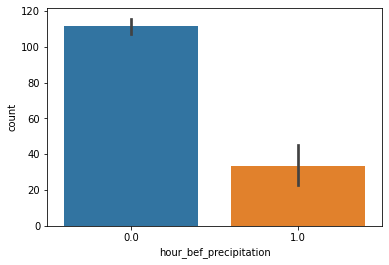

In [70]:
# 우천 여부에 따른 대여 대수 그래프
# 비가 오는 날 보다 비가 오지 않는 날 따릉이 대여 수가 더 많은 것을 볼 수 있다.
data = data[(data['hour_bef_precipitation'] == 0.0) | (data['hour_bef_precipitation'] == 1.0)]

sns.barplot(data['hour_bef_precipitation'], data['count'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


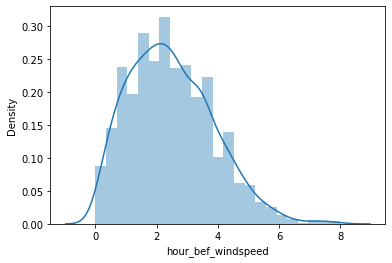

In [71]:
# 풍속 데이터는 왼쪽으로 치우쳐진 정규분포를 따르는 것을 볼 수 있다.
sns.distplot(data['hour_bef_windspeed'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


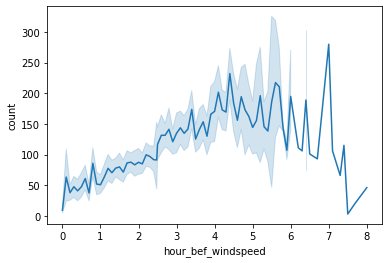

In [72]:
# 풍속에 따른 대여 대수 그래프
# 풍속이 높을 수록 따릉이 대여수가 많아지다가 6이상 넘어가면 줄어드는 것을 볼 수 있다.
sns.lineplot(data['hour_bef_windspeed'], data['count'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


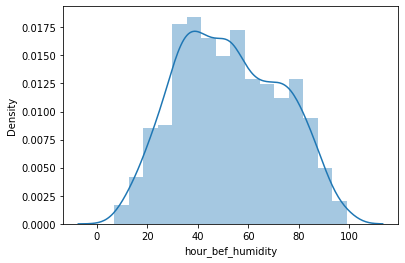

In [73]:
# 습도 데이터는 정규분포를 따르는 것을 볼 수 있다.
sns.distplot(data['hour_bef_humidity'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


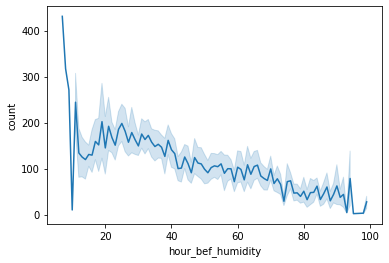

In [74]:
# 습도에 따른 대여 대수 그래프
# 습도가 높을 수록 따릉이 대여수가 적어지는 걸 볼 수 있다.
sns.lineplot(data['hour_bef_humidity'], data['count'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


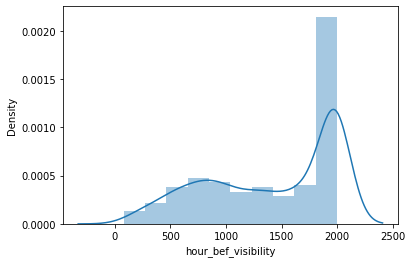

In [75]:
# 시계 데이터는 2000에서 가장 많은 분포를 보인다.
sns.distplot(data['hour_bef_visibility'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


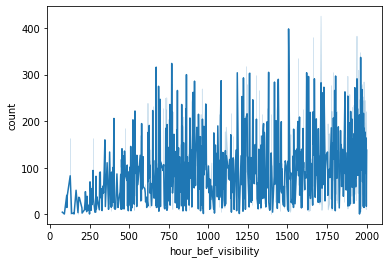

In [76]:
# 시계에 따른 대여 대수 그래프
# 시계와 따릉이 대여수는 크게 상관이 없어 보인다.
sns.lineplot(data['hour_bef_visibility'], data['count'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


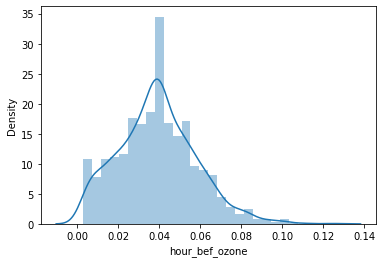

In [77]:
# 오존 데이터는 왼쪽으로 치우쳐진 분포를 보인다.
sns.distplot(data['hour_bef_ozone'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


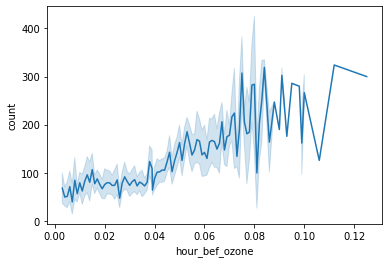

In [78]:
# 오존 농도에 따른 대여 대수 그래프
# 오존 농도가 높아질 수록 따릉이 대여수도 높아지는 것을 볼 수 있다.
sns.lineplot(data['hour_bef_ozone'], data['count'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


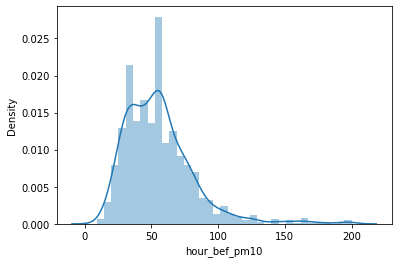

In [79]:
# 미세먼지 데이터는 왼쪽으로 치우쳐진 정규 분포를 보인다.
sns.distplot(data['hour_bef_pm10'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


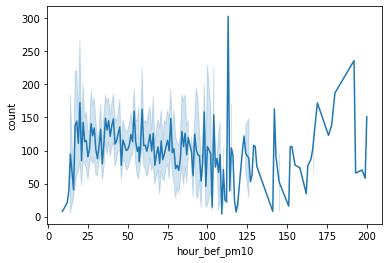

In [80]:
# 미세먼지 농도에 따른 대여 대수 그래프
# 미세먼지 농도가 농도는 따릉이 대여 대수와 관계가 없는 것으로 보인다.
sns.lineplot(data['hour_bef_pm10'], data['count'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


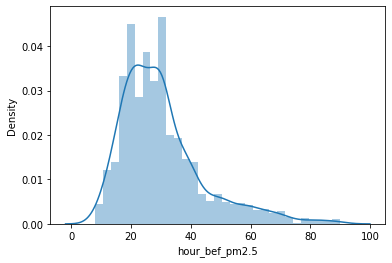

In [81]:
# 초미세먼지 데이터는 왼쪽으로 치우쳐진 분포를 보인다.
sns.distplot(data['hour_bef_pm2.5'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


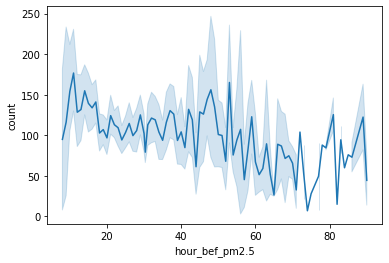

In [82]:
# 초미세먼지 농도에 따른 대여 대수 그래프
# 초미세먼지 농도가 농도는 따릉이 대여 대수와 관계가 없는 것으로 보인다.
sns.lineplot(data['hour_bef_pm2.5'], data['count'])

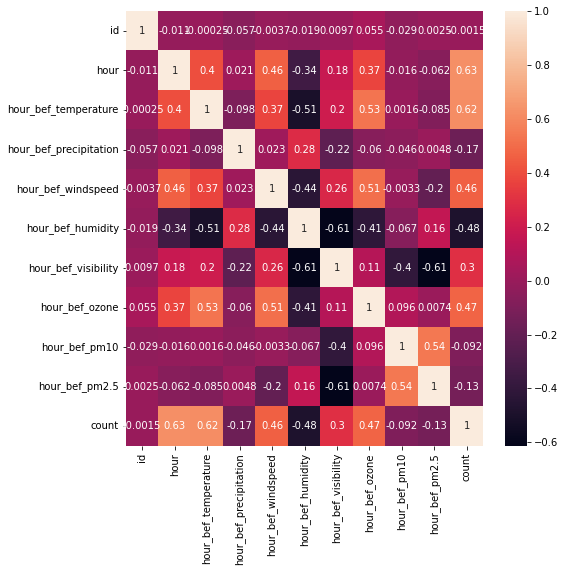

In [83]:
# 각 변수들 간의 상관관계 heatmap 그래프
# 따릉이 대여 대수와 hour, temperature, ozone, windspeed 순으로 상관관계가 높은 것을 볼 수 있다.
plt.figure(figsize=(8, 8))
sns.heatmap(data.corr(),annot=True) 

In [84]:
# 데이터 분석

In [85]:
data = data.reset_index(drop=True)

In [86]:
# 독립변수 데이터 생성
X = data.drop(['id', 'count'], axis = 1)

In [87]:
# 종속변수 데이터 생성
y = data['count']

In [88]:
# 전체 데이터 셋에서 학습용 데이터 80%, 평가용 데이터 20%를 사용하여 분석하였다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [89]:
# StandardScaler를 진행했지만 결과가 좋지 않아 사용하지 않았다.
"""
scaler = StandardScaler()
scaled = scaler.fit(X_train)
scaled_X_train = scaled.transform(X_train)
scaled_X_test = scaled.transform(X_test)
"""

'\nscaler = StandardScaler()\nscaled = scaler.fit(X_train)\nscaled_X_train = scaled.transform(X_train)\nscaled_X_test = scaled.transform(X_test)\n'

In [90]:
# RandomForest Regeressor 모델 학습
rfr = RandomForestRegressor(n_estimators=200, random_state=42)
model_rfr = rfr.fit(X_train, y_train)
pred_rfr = model_rfr.predict(X_test)

In [91]:
# RandomForest Regeressor 모델 평가
print(np.sqrt(mean_squared_error(y_test,pred_rfr)))

34.06457457540693


In [92]:
# Linear Regression 모델 학습
lr = LinearRegression()
model_lr = lr.fit(X_train, y_train)
pred_lr = model_lr.predict(X_test)

In [93]:
# Linear Regression 모델 평가
print(np.sqrt(mean_squared_error(y_test,pred_lr)))

47.919521703838946


In [94]:
# DecisionTree Regressor 모델 학습
tree = DecisionTreeRegressor(random_state=42)
model_tree = tree.fit(X_train, y_train)
pred_tree = model_tree.predict(X_test)

In [95]:
# DecisionTree Regressor 모델 평가
print(np.sqrt(mean_squared_error(y_test,pred_tree)))

53.17259876586409
